In [372]:
import pandas as pd

In [475]:
data = pd.read_json('user-tweets-javi.json', lines=True)

In [476]:
data

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/14925471383...,2022-02-12 17:12:22+00:00,POV: estás empezando a investigar sobre tu TFM...,POV: estás empezando a investigar sobre tu TFM...,1492547138341031937,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/14871307572...,2022-01-28 18:29:36+00:00,"@Bayyonne Es mágico, hay que creer en ello","@Bayyonne Es mágico, hay que creer en ello",1487130757264982029,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,...,None,NaN,None,1.487129e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/14871262273...,2022-01-28 18:11:36+00:00,@Bayyonne JAQUE MATE,@Bayyonne JAQUE MATE,1487126227345416200,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,1.487126e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/14871261196...,2022-01-28 18:11:11+00:00,@Bayyonne Pros del Wanda:\nTiene enchufes\n\nC...,@Bayyonne Pros del Wanda:\nTiene enchufes\n\nC...,1487126119660802054,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,1,0,...,None,NaN,None,1.487124e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/13677854626...,2021-03-05 10:34:01+00:00,"@Marina96gg @pableeras98 Yo tampoco, no entien...","@Marina96gg @pableeras98 Yo tampoco, no entien...",1367785462639845378,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,1.367783e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/35941341662...,2013-07-22 20:43:30+00:00,"A mí me encantas tu, guapetona :* @ClaraaFolgu...","A mí me encantas tu, guapetona :* @ClaraaFolgu...",359413416621907968,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,None,NaN,None,3.594021e+17,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,None,NaN
1996,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/35933437095...,2013-07-22 15:29:24+00:00,JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA CULO....,JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA CULO....,359334370953658368,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,3,...,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN
1997,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/35933404023...,2013-07-22 15:28:05+00:00,@RaquelPique3 dice que la deis follow. O que l...,@RaquelPique3 dice que la deis follow. O que l...,359334040232402944,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,None,NaN,None,NaN,None,None,NaN,NaN,None,NaN
1998,snscrape.modules.twitter.Tweet,https://twitter.com/Jabubu_/status/35904802051...,2013-07-21 20:31:33+00:00,"Ya te dejo, mujer, ya te dejo jaja @ClaraaFolg...","Ya te dejo, mujer, ya te dejo jaja @ClaraaFolg...",359048020517588994,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,0,...,None,NaN,None,3.587420e+17,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,None,NaN


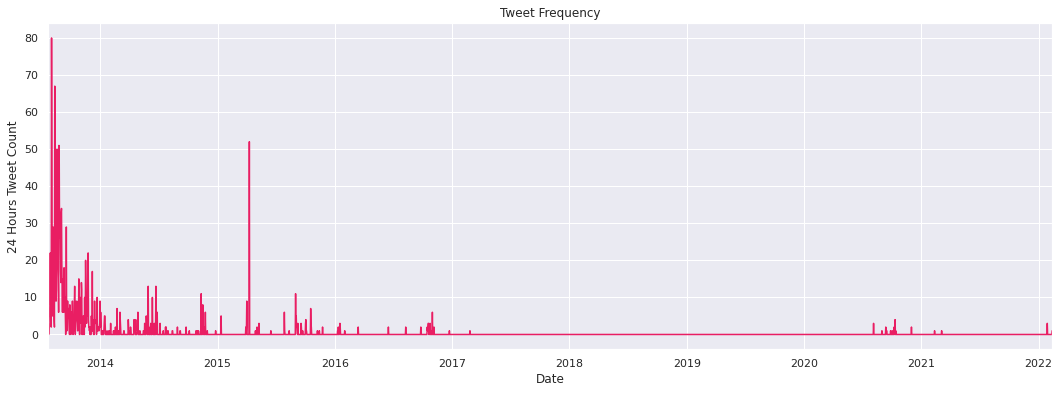

In [477]:
# INCLUIR EN SERVER
import matplotlib.pyplot as plt

tweet_df_5min = data.groupby(pd.Grouper(key='date', freq='24H', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6), color='#e91e63')

plt.ylabel('24 Hours Tweet Count')
plt.xlabel('Date')
plt.title('Tweet Frequency')
plt.grid(True)
plt.savefig('test.png', transparent=True)
plt.show()


In [478]:
#INCLUIR EN SERVER
data["n_words"] = data["content"].apply(lambda x: len(x))
data['n_words'].mean()

55.17

In [479]:
data['n_words'].max()

260

In [493]:
import collections

result=data.apply(lambda row: re.findall("@([a-zA-Z0-9]{1,15})",row['content']), axis=1)
# METER EN SERVER
result_filtered = [x for x in result if x]
result_flat = [x for xs in result_filtered for x in xs]

result_flat

counter=collections.Counter(result_flat)
values = counter.most_common(5)


import json

jsonString = json.dumps(counter.most_common(5))
values[0]

('Fleeeys', 97)

In [242]:
data['user'][0]

{'_type': 'snscrape.modules.twitter.User',
 'username': 'IbaiLlanos',
 'id': 2754746065,
 'displayname': 'Ibai',
 'description': 'Sigue a nuestro equipo @KOI, twitch.tv/ibai, youtube.com/channel/UCaY_-…,',
 'rawDescription': 'Sigue a nuestro equipo @KOI, https://t.co/CaLlqtBLac, https://t.co/ipt9q2MZWu,',
 'descriptionUrls': [{'text': 'twitch.tv/ibai',
   'url': 'http://twitch.tv/ibai',
   'tcourl': 'https://t.co/CaLlqtBLac',
   'indices': [29, 52]},
  {'text': 'youtube.com/channel/UCaY_-…',
   'url': 'https://youtube.com/channel/UCaY_-ksFSQtTGk0y1HA_3YQ',
   'tcourl': 'https://t.co/ipt9q2MZWu',
   'indices': [54, 77]}],
 'verified': True,
 'created': '2014-08-22T11:50:45+00:00',
 'followersCount': 9005895,
 'friendsCount': 875,
 'statusesCount': 64772,
 'favouritesCount': 42180,
 'listedCount': 2763,
 'mediaCount': 8578,
 'location': 'Barcelona',
 'protected': False,
 'linkUrl': 'http://twitch.tv/ibai',
 'linkTcourl': 'https://t.co/CaLlqtBLac',
 'profileImageUrl': 'https://pbs.twimg.c

In [243]:
data['user'][0].get('username')

'IbaiLlanos'

In [244]:
data.drop(['_type', 'url', 'date', 'renderedContent',  'id', 'replyCount', 'likeCount', 'quoteCount','conversationId', 'lang', 'source','sourceUrl', 'outlinks', 'tcooutlinks', 'sourceLabel', 'retweetCount', 'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags',], axis=1, inplace=True)

In [252]:
user_df = pd.DataFrame.from_dict(data['user'][0], orient ='index')
user_df

,0
_type,snscrape.modules.twitter.User
username,IbaiLlanos
id,2754746065
displayname,Ibai
description,"Sigue a nuestro equipo @KOI, twitch.tv/ibai, y..."
rawDescription,"Sigue a nuestro equipo @KOI, https://t.co/CaLl..."
descriptionUrls,"[{'text': 'twitch.tv/ibai', 'url': 'http://twi..."
verified,True
created,2014-08-22T11:50:45+00:00
followersCount,9005895


In [253]:
data_grouped=data.groupby(data.user.apply(pd.Series).username).content.apply(list).transform(lambda x : ' '.join(x)).reset_index()

In [254]:
 y_pred=data_grouped['content']

In [255]:
y_pred[0]

'HABLEMOS DE LA VELADA DEL AÑO II\n\nHAGAMOS TRIVIALS\n\nY JUGUEMOS A PORCINOS FC\nhttps://t.co/cL2WMc1Rjw @aXoZerr se me han caído las pelotas al suelo VELADA DEL AÑO II.\n\nSÁBADO 25 DE JUNIO.\n\n18:00. https://t.co/19Si6LxrTz Bizarrap\nDuki\nNicki Nicole\nRels B \n\nTodos ellos actuarán en la Velada del año II. https://t.co/7zeTUCnPer Bustamante será el nuevo rival de Jagger en la velada del año 2. https://t.co/pu6Zp7fxDi ESTAMOS EN EL AIRE\n\nMUCHAS NOTICIAS SOBRE LA VELADA 2\n\nRETUIT Y ENTREN\nhttps://t.co/cL2WMcjsI6 https://t.co/1CfIp2QEPh HOY A LAS 20:00\n\nNUEVO BOXEADOR\n\nARTISTAS CONFIRMADOS\n\nENTRADAS A LA VENTA\n\nNOS VEMOS EN TWITCH https://t.co/UjeMRWiFWi PORCINOS FC CON UN NUEVO FICHAJE\n\nMAÑANA NUEVO BOXEADOR, ARTISTAS Y ENTRADAS DE LA VELADA SIUUUUUUUUU\nhttps://t.co/cL2WMcjsI6 TÚ NO ERES BEBESITA TÚ ERES BEBESOTA @GomezRM__ Eres un hijo de la gran puta @Koldo_LoL @QueMirasbobo_ No le respondas Koldito, es un zumbado, todos los días está igual hateando a KOI. Debe 

In [256]:
import re
text_clean = re.sub(r"(?:\@|https?\://)\S+", "", y_pred[0])
text_clean

'HABLEMOS DE LA VELADA DEL AÑO II\n\nHAGAMOS TRIVIALS\n\nY JUGUEMOS A PORCINOS FC\n  se me han caído las pelotas al suelo VELADA DEL AÑO II.\n\nSÁBADO 25 DE JUNIO.\n\n18:00.  Bizarrap\nDuki\nNicki Nicole\nRels B \n\nTodos ellos actuarán en la Velada del año II.  Bustamante será el nuevo rival de Jagger en la velada del año 2.  ESTAMOS EN EL AIRE\n\nMUCHAS NOTICIAS SOBRE LA VELADA 2\n\nRETUIT Y ENTREN\n  HOY A LAS 20:00\n\nNUEVO BOXEADOR\n\nARTISTAS CONFIRMADOS\n\nENTRADAS A LA VENTA\n\nNOS VEMOS EN TWITCH  PORCINOS FC CON UN NUEVO FICHAJE\n\nMAÑANA NUEVO BOXEADOR, ARTISTAS Y ENTRADAS DE LA VELADA SIUUUUUUUUU\n TÚ NO ERES BEBESITA TÚ ERES BEBESOTA  Eres un hijo de la gran puta   No le respondas Koldito, es un zumbado, todos los días está igual hateando a KOI. Debe ser la cuenta secundaria de José el de Giants. Muteale y que se quede ahí hablando solo.  totalmente de acuerdo  Para subir en las tier list como ad carry te tienes que llamar Jackspektra.  ets un clan tot el cam  Un fuerte ab

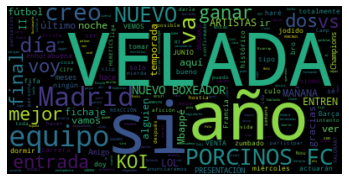

In [257]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('spanish','english')

# Start with one review:
text = text

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text_clean)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [258]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def preprocess(words, type='doc'):
    tokens = nltk.word_tokenize(words)
    porter = nltk.PorterStemmer()
    lemmas = [porter.stem(t) for t in tokens]
    stoplist = stopwords.words('spanish')
    lemmas_clean = [w for w in tokens if w not in stoplist]
    punctuation = set(string.punctuation)
    words = [w for w in lemmas_clean if  w not in punctuation]
    return words

text_processed = preprocess(text_clean)


In [259]:
# Python program to find the k most frequent words
# from data set
from collections import Counter
  
data_set = text_processed
  
# split() returns list of all the words in the string
#split_it = data_set.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(data_set)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(50)
  
print(most_occur)

[('NO', 7), ('No', 7), ('si', 7), ('Madrid', 7), ('DE', 6), ('LA', 6), ('A', 6), ('FC', 6), ('va', 6), ('equipo', 6), ('VELADA', 5), ('Y', 5), ('2', 5), ('NUEVO', 5), ('creo', 5), ('PORCINOS', 4), ('nuevo', 4), ('velada', 4), ('KOI', 4), ('Me', 4), ('años', 4), ('ganar', 4), ('mejor', 4), ('final', 4), ('II', 3), ('año', 3), ('ENTREN', 3), ('TÚ', 3), ('ver', 3), ('alguien', 3), ('noche', 3), ('gracias', 3), ('aquí', 3), ('Esto', 3), ('ir', 3), ('Mbappé', 3), ('vs', 3), ('fútbol', 3), ('dos', 3), ('día', 3), ('Champions', 3), ('meses', 3), ('Porcinos', 3), ('DEL', 2), ('AÑO', 2), ('25', 2), ('actuarán', 2), ('Velada', 2), ('EN', 2), ('EL', 2)]


In [260]:
y_pred[0]

'HABLEMOS DE LA VELADA DEL AÑO II\n\nHAGAMOS TRIVIALS\n\nY JUGUEMOS A PORCINOS FC\nhttps://t.co/cL2WMc1Rjw @aXoZerr se me han caído las pelotas al suelo VELADA DEL AÑO II.\n\nSÁBADO 25 DE JUNIO.\n\n18:00. https://t.co/19Si6LxrTz Bizarrap\nDuki\nNicki Nicole\nRels B \n\nTodos ellos actuarán en la Velada del año II. https://t.co/7zeTUCnPer Bustamante será el nuevo rival de Jagger en la velada del año 2. https://t.co/pu6Zp7fxDi ESTAMOS EN EL AIRE\n\nMUCHAS NOTICIAS SOBRE LA VELADA 2\n\nRETUIT Y ENTREN\nhttps://t.co/cL2WMcjsI6 https://t.co/1CfIp2QEPh HOY A LAS 20:00\n\nNUEVO BOXEADOR\n\nARTISTAS CONFIRMADOS\n\nENTRADAS A LA VENTA\n\nNOS VEMOS EN TWITCH https://t.co/UjeMRWiFWi PORCINOS FC CON UN NUEVO FICHAJE\n\nMAÑANA NUEVO BOXEADOR, ARTISTAS Y ENTRADAS DE LA VELADA SIUUUUUUUUU\nhttps://t.co/cL2WMcjsI6 TÚ NO ERES BEBESITA TÚ ERES BEBESOTA @GomezRM__ Eres un hijo de la gran puta @Koldo_LoL @QueMirasbobo_ No le respondas Koldito, es un zumbado, todos los días está igual hateando a KOI. Debe 